In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.6f}'.format  

# 그래프에서 한글 깨짐 방지
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_origin = pd.read_csv('./datasets/원본data.csv',index_col=0)
df=pd.read_csv('./datasets/원본data.csv',index_col=0)

## 데이터 전처리

In [3]:
## 경제심리지수, 기계류내수출,수출입물가비율 ,장단기금리차, 외환보유액, 뉴스심리지수, 원달러,G20, 천연가스--> 정상적이다

## G7. G20은 비슷하므로 G7 drop
#df2=df2.drop('G7',axis=1)

df['재고순환지표']+=25
df['재고순환지표']=np.log1p(df['재고순환지표']/df['재고순환지표'].shift(1))
df['건설수주액']=np.log1p(df['건설수주액']/df['건설수주액'].shift(1))
df['코스피']=np.log1p(df['코스피']/df['코스피'].shift(1))
df['원엔']=np.log1p(df['원엔']/df['원엔'].shift(1))
df['원위안']=np.log1p(df['원위안']/df['원위안'].shift(1))
df['CD']=np.log1p(df['CD']/df['CD'].shift(1))
df['유가']=np.log1p(df['유가']/df['유가'].shift(1))
df['미장단기']+=0.9
df['미장단기']=np.log1p(df['미장단기']/df['미장단기'].shift(1))
df['거래량']=np.log1p(df['거래량']/df['거래량'].shift(1))
df['구리']=np.log1p(df['구리']/df['구리'].shift(1))
df['은']=np.log1p(df['은']/df['은'].shift(1))
df['금']=np.log1p(df['금']/df['금'].shift(1))

df['종가']=np.log(df['종가']/df['종가'].shift(1))
df=df.dropna(axis=0)


## 공선성 높은 애들 삭제

In [4]:
df.drop(['유가','은','원위안','외환보유액'],axis=1,inplace=True)

##  그레인저 인과 검정

In [5]:
from statsmodels.tsa.stattools import grangercausalitytests
#df.replace(',', '', regex=True, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce') # numeric 변환
maxlag= 6
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=True):

    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            # if verbose:print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            min_p_value_index = np.argmin(p_values)
            df.loc[r, c] = min_p_value
            # print(r,c)
            # print(f'Minimum P-value Index: {min_p_value_index} (Lag: {min_p_value_index + 1})')
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df
df_granger=grangers_causation_matrix(df, variables = df.columns)
#df.to_csv('granger검정.csv')
df_granger

,재고순환지표_x,경제심리지수_x,기계류내수출_x,건설수주액_x,수출입물가비율_x,코스피_x,장단기_x,뉴스심리지수_x,원달러_x,원엔_x,CD_x,G20_x,미장단기_x,거래량_x,구리_x,천연가스_x,금_x,종가_x
재고순환지표_y,1.000000,0.000000,0.014100,0.042800,0.000000,0.000000,0.000000,0.001300,0.000000,0.000000,0.000000,0.015800,0.008600,0.000000,0.000000,0.143800,0.000000,0.000100
경제심리지수_y,0.000200,1.000000,0.186400,0.106500,0.000300,0.000000,0.000000,0.000000,0.070000,0.000000,0.304000,0.000000,0.290300,0.000200,0.000000,0.002500,0.022600,0.000000
기계류내수출_y,0.215400,0.001000,1.000000,0.560300,0.016300,0.005200,0.001300,0.000000,0.097500,0.004600,0.071800,0.007900,0.058400,0.173100,0.012000,0.088700,0.068500,0.000200
건설수주액_y,0.141600,0.248700,0.082800,1.000000,0.188700,0.505100,0.016200,0.472600,0.272300,0.089400,0.368200,0.139000,0.304500,0.390200,0.565700,0.030200,0.115700,0.489700
수출입물가비율_y,0.019000,0.000000,0.015100,0.054100,1.000000,0.000000,0.000000,0.000000,0.008900,0.003900,0.006900,0.000000,0.431000,0.265600,0.000000,0.069000,0.037400,0.000000
코스피_y,0.001200,0.000100,0.149900,0.085100,0.000000,1.000000,0.000400,0.000000,0.000100,0.091500,0.010300,0.000000,0.005000,0.233100,0.013400,0.005800,0.269400,0.000000
장단기_y,0.000000,0.000000,0.000000,0.001700,0.000000,0.004700,1.000000,0.088900,0.002200,0.001000,0.000000,0.000000,0.000000,0.095400,0.149200,0.005500,0.009400,0.003900
뉴스심리지수_y,0.256600,0.029500,0.450700,0.261300,0.000400,0.199700,0.072000,1.000000,0.024700,0.819200,0.056400,0.001100,0.243600,0.410600,0.045300,0.002300,0.006700,0.836800
원달러_y,0.000000,0.007200,0.191400,0.201500,0.095100,0.000000,0.000000,0.000000,1.000000,0.018400,0.024200,0.003200,0.081300,0.059900,0.000000,0.000000,0.373100,0.002800
원엔_y,0.000000,0.003300,0.280300,0.023200,0.006900,0.000100,0.081200,0.000000,0.037700,1.000000,0.095100,0.109200,0.496100,0.127000,0.000100,0.000200,0.055300,0.485300


In [6]:
df_granger.shape

(18, 18)

## 선정된 피쳐들로 최적의 lag찾기

In [7]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

model_var = VAR(endog=df[['재고순환지표','경제심리지수','수출입물가비율','코스피','장단기','원달러','CD','G20','구리','종가']])            
res = model_var.select_order(6)            
res.summary()

c:\Users\dgh06\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,-15.45,-15.27,1.955e-07,-15.38
1,-30.70,-28.73,4.658e-14,-29.90
2,-32.96,-29.19*,4.905e-15,-31.43*
3,-33.38,-27.81,3.314e-15,-31.12
4,-33.52,-26.16,3.029e-15,-30.53
5,-33.81,-24.66,2.452e-15*,-30.10
6,-33.82*,-22.87,2.751e-15,-29.38


## VARMAX 모델(업데이트)

In [8]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VARMAX
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random


data=df.iloc[:147][['재고순환지표','경제심리지수','수출입물가비율','코스피','장단기','원달러','CD','G20','미장단기','거래량','구리','종가']]
exog=df.iloc[:147][['뉴스심리지수','천연가스']]

# 모델 피팅
model = VARMAX(data, exog=exog, order=(1, 0))
model_fit = model.fit(disp=False)
# model_fit.summary()
# # 예측
# yhat = model_fit.forecast(steps=1, exog=[[random(), random()]])
# print(yhat)

c:\Users\dgh06\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


KeyboardInterrupt: 

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX

# train 데이터 프레임 정의
train_data = df.iloc[:147][['재고순환지표','경제심리지수','수출입물가비율','코스피','장단기','원달러','CD','G20','미장단기','거래량','구리','종가']]
train_exog = df.iloc[:147][['뉴스심리지수','천연가스']]
train = pd.DataFrame(train_data)
train_exog = pd.DataFrame(train_exog)

# test 데이터 프레임 정의
test_data = df.iloc[147:][['재고순환지표','경제심리지수','수출입물가비율','코스피','장단기','원달러','CD','G20','미장단기','거래량','구리','종가']]
test_exog = df.iloc[147:][['뉴스심리지수','천연가스']]
test = pd.DataFrame(test_data)
test_exog = pd.DataFrame(test_exog)

# Initialize empty DataFrame to store predictions
pred = pd.DataFrame(columns=train.columns)

for t in range(len(test)):
    # Fit VARMAX model
    model_varmax = VARMAX(endog=train, exog=train_exog, order=(1, 1))
    model_fit = model_varmax.fit(disp=False)

    # One step forecast
    forecast = model_fit.forecast(steps=1, exog=test_exog.iloc[[t]])

    # Append the prediction to pred DataFrame
    pred = pd.concat([pred, pd.DataFrame(forecast, columns=pred.columns)], ignore_index=True)

    # Append the current test observation to train DataFrame for the next training
    train = pd.concat([train, test.iloc[[t]]], ignore_index=True)
    train_exog = pd.concat([train_exog, test_exog.iloc[[t]]], ignore_index=True)

pred.reset_index(drop=True, inplace=True)


- "LinAlgError: Schur decomposition solver error" 오류는 주로 데이터에 관련된 문제일 가능성이 높습니다. -->(order=(1,0)에서 이런 오류가 났다)
- 코드 자체에는 오류가 없을 수 있지만, 모델에 입력되는 데이터의 형태나 특성이 문제를 일으킬 수 있습니다.

## 실제값 복원 및 데이터프레임

In [ ]:
pred['date']= test.index
pred=pred.set_index('date')

In [ ]:
show=pd.concat([pred['종가'],test['종가']], axis=1, keys=['예측', '실제'])


In [ ]:
a=df_origin[148:][['종가']]
show=pd.concat([show,a],axis=1).rename(columns={'종가':'실제종가'})
b=df_origin[147:-1]['종가'].values * np.exp(show['예측'].values)
show['예측종가']=b
show.rename(columns={0 : '예측종가'},inplace=True)



In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Calculate mean absolute error
mae = mean_absolute_error(show['실제종가'],show['예측종가'])
print('MAE: %f' % mae)

#Calculate mean squared error and root mean squared error
mse = mean_squared_error(show['실제종가'], show['예측종가'])
print('MSE: %f' % mse) 
rmse = np.sqrt(mse)
print('RMSE: %f' % rmse)

MAE: 95.888104
MSE: 12804.066042
RMSE: 113.155053


## 실제값,예측값 그래프

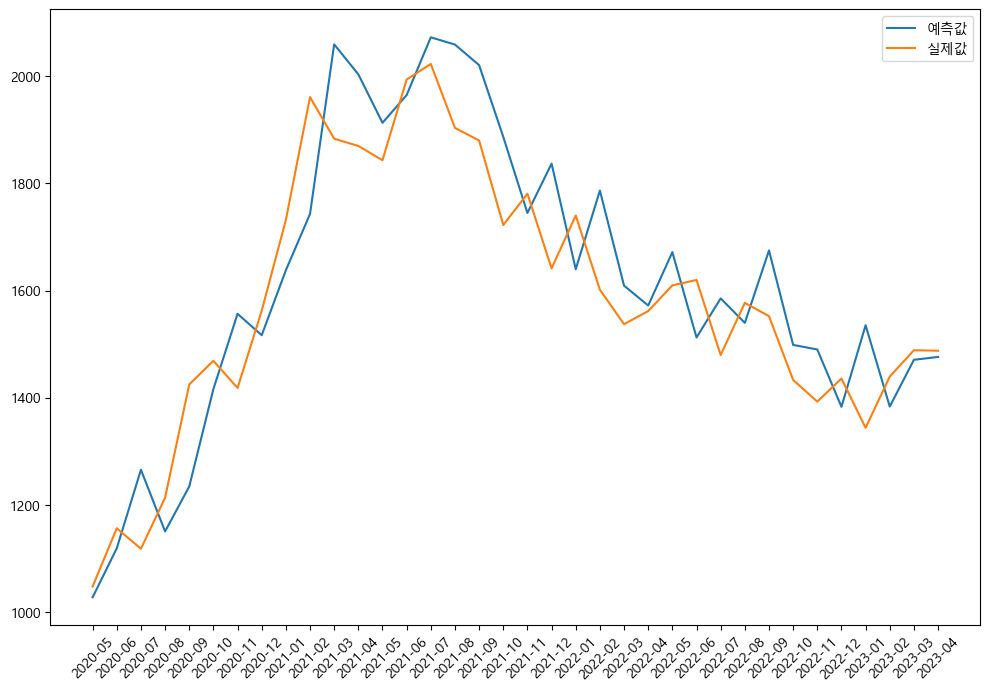

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plt.plot(show.index, show['예측종가'],label='예측값')
plt.plot(show.index, show['실제종가'],label='실제값')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [9]:
pd.read_csv('./datasets/varmax_final_update.csv')

,Unnamed: 0,재고순환지표,경제심리지수,수출입물가비율,코스피,장단기,원달러,CD,종가
0,0,0.700416,67.321176,99.781929,0.656352,0.431770,1305.057411,0.532573,-0.030239
1,1,0.435782,55.203205,101.513071,0.546439,0.793291,1305.145522,0.544420,-0.100697
2,2,0.508635,65.181212,99.819775,0.700466,0.806573,1296.188306,0.610598,0.058067
3,3,0.591749,79.047519,97.861111,0.480338,0.862985,1210.552661,0.649639,0.055270
4,4,0.681794,87.899440,97.545591,0.593098,0.474995,1156.302573,0.631054,0.094737
5,5,1.392107,85.093749,94.753986,0.707766,0.874475,1168.717109,0.674729,-0.034551
6,6,1.494205,93.321272,93.269083,0.691278,0.713444,1106.615525,0.729168,-0.103981
7,7,0.912239,95.027990,93.504287,0.709774,0.797931,1104.835162,0.690055,0.127580
8,8,0.899520,90.766029,95.108781,0.712544,0.756506,1093.566801,0.752800,0.040973
9,9,0.860769,98.607499,93.837722,0.728555,0.774374,1048.730822,0.745477,0.062571
